# color_analysis.ipynb

Name: Marvin Limpijankit  
Email: ml4431@columbia.edu  
  
This notebook covers the analysis section for this project regarding a color-based approach. In this notebook, we will attempt to visualize and quantify the differences between images of the search term 'Ukraine' from both Western and Chinese sources using a variety of techniques that pertain to the color properties of the images.

In [1]:
# import packages
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import functions
sys.path.insert(0, '/Users/marvinlimpijankit/Desktop/COMS4901-spr2023/lib')

from color_analysis import *

In [3]:
# silence warnings
import warnings

warnings.filterwarnings('ignore')

In the following section we extract the data from images into .csv files where each of the 16,384 columns correspond to pixels in the 128x128 image in their corresponding format. We will experiment with 3 different color spaces RGB, HSV, and LAB space. Each is represented by 3 values and more information on all these color spaces can be found using the link below. The code snippet below is used to produce three .csv files in the /output folder, one for each color space. 

https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html#color_convert_rgb_hsv

In [3]:
# store a list of website names, along with their region
websites = [('CNN', 'US'), ('NBC', 'US'), ('NYT', 'US'), ('China_Daily', 'China'), 
            ('People\'s_Daily', 'China'), ('Xinhua_News_Agency', 'China')]

# extract the image data as a dataframe where each row is an image, each column corresponds to individual pixels
extract_img_data('../output/normalized(128, 128)', '../output', websites, 'rgb')
extract_img_data('../output/normalized(128, 128)', '../output', websites, 'hsv')
extract_img_data('../output/normalized(128, 128)', '../output', websites, 'lab')

Extracted rgb data to file ../output/img_data_rgb.csv
Extracted hsv data to file ../output/img_data_hsv.csv
Extracted lab data to file ../output/img_data_lab.csv


,0,1,2,3,4,5,6,7,8,9,...,16377,16378,16379,16380,16381,16382,16383,16384,16385,16386
0,US,CNN,img_10.jpg,"[54, 133, 134]","[41, 133, 134]","[30, 133, 135]","[27, 132, 135]","[31, 133, 136]","[32, 133, 136]","[34, 133, 137]",...,"[219, 121, 115]","[247, 118, 123]","[249, 121, 124]","[251, 120, 125]","[245, 121, 122]","[224, 121, 122]","[195, 122, 120]","[147, 123, 120]","[100, 127, 120]","[77, 129, 119]"
1,US,CNN,img_38.jpg,"[33, 134, 122]","[19, 132, 115]","[40, 133, 102]","[105, 127, 101]","[102, 127, 106]","[7, 130, 116]","[9, 132, 130]",...,"[58, 121, 146]","[58, 121, 146]","[55, 122, 146]","[46, 121, 146]","[76, 121, 144]","[40, 122, 145]","[32, 124, 141]","[28, 123, 140]","[19, 122, 138]","[17, 124, 137]"
2,US,CNN,img_1.jpg,"[215, 128, 119]","[215, 128, 119]","[215, 128, 119]","[216, 128, 119]","[216, 128, 119]","[216, 128, 119]","[216, 128, 119]",...,"[232, 129, 119]","[217, 129, 119]","[210, 129, 118]","[196, 129, 118]","[235, 129, 119]","[232, 129, 118]","[229, 129, 118]","[234, 129, 118]","[227, 129, 118]","[219, 129, 118]"
3,US,CNN,img_0.jpg,"[220, 123, 107]","[215, 124, 106]","[213, 126, 104]","[213, 127, 103]","[209, 127, 103]","[205, 126, 104]","[209, 126, 104]",...,"[74, 118, 130]","[75, 118, 129]","[20, 120, 126]","[14, 122, 126]","[24, 121, 125]","[20, 122, 124]","[39, 120, 126]","[18, 122, 126]","[2, 128, 126]","[1, 128, 127]"
4,US,CNN,img_39.jpg,"[47, 143, 102]","[45, 143, 102]","[45, 143, 102]","[47, 143, 102]","[47, 144, 101]","[45, 144, 101]","[46, 145, 100]",...,"[69, 130, 143]","[72, 127, 151]","[79, 127, 155]","[89, 126, 159]","[88, 126, 161]","[92, 125, 162]","[100, 123, 160]","[86, 123, 155]","[61, 126, 142]","[23, 128, 136]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,China,Xinhua_News_Agency,img_22.jpg,"[5, 130, 126]","[5, 130, 126]","[5, 130, 126]","[5, 130, 126]","[3, 130, 126]","[3, 130, 126]","[5, 130, 126]",...,"[64, 134, 125]","[65, 136, 126]","[54, 136, 126]","[55, 136, 124]","[54, 138, 121]","[47, 135, 116]","[52, 131, 108]","[61, 132, 103]","[55, 137, 96]","[58, 140, 93]"
589,China,Xinhua_News_Agency,img_34.jpg,"[77, 117, 147]","[109, 117, 146]","[128, 118, 143]","[163, 119, 141]","[107, 121, 138]","[132, 122, 134]","[124, 125, 131]",...,"[106, 118, 151]","[139, 117, 152]","[124, 117, 153]","[117, 117, 154]","[140, 116, 152]","[113, 117, 152]","[130, 116, 150]","[155, 118, 148]","[119, 120, 147]","[130, 122, 146]"
590,China,Xinhua_News_Agency,img_20.jpg,"[239, 122, 123]","[240, 122, 123]","[226, 124, 120]","[195, 124, 120]","[236, 125, 121]","[242, 125, 122]","[242, 125, 124]",...,"[68, 133, 134]","[58, 132, 132]","[65, 129, 135]","[54, 126, 134]","[53, 130, 128]","[49, 130, 131]","[61, 132, 138]","[73, 131, 142]","[118, 131, 137]","[157, 130, 136]"
591,China,Xinhua_News_Agency,img_21.jpg,"[175, 133, 136]","[178, 133, 136]","[183, 132, 137]","[185, 132, 137]","[186, 133, 136]","[187, 133, 135]","[187, 133, 134]",...,"[217, 127, 134]","[218, 127, 134]","[219, 129, 134]","[221, 129, 134]","[228, 128, 135]","[224, 128, 135]","[223, 128, 135]","[222, 128, 135]","[225, 128, 136]","[217, 128, 136]"


In [3]:
# load the data
rgb = pd.read_csv('../output/img_data_rgb.csv', header=None)
hsv = pd.read_csv('../output/img_data_hsv.csv', header=None)
lab = pd.read_csv('../output/img_data_lab.csv', header=None)

Finally, let's visualize some images from our dataset ... 

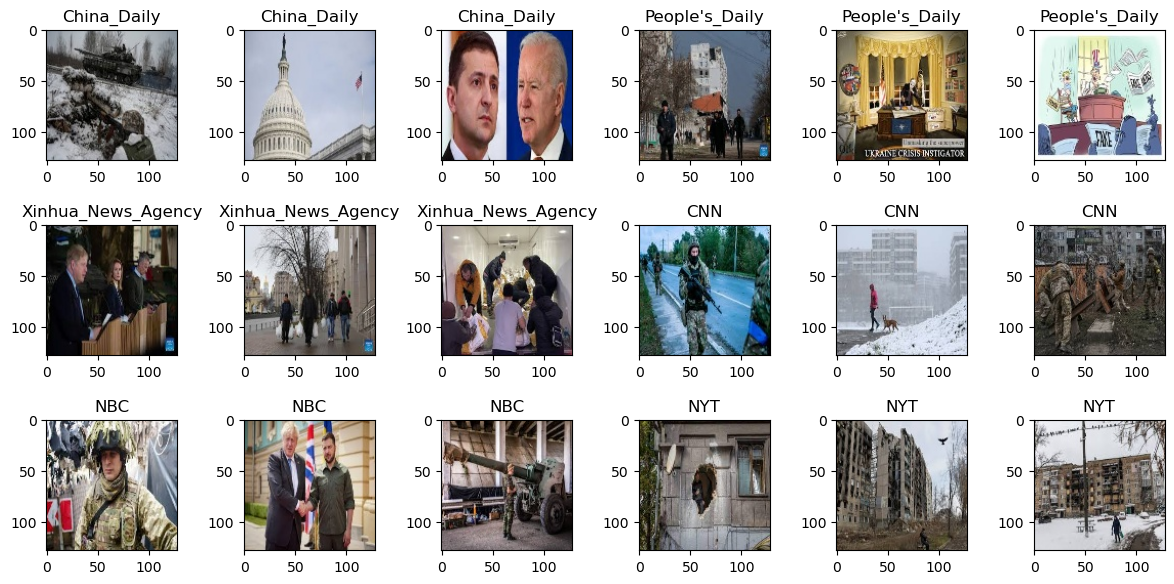

In [4]:
# Visualize 3 images from each source
fig, axs = plt.subplots(3, 6, figsize=(12,6))

fig.tight_layout()

for index, website in enumerate(['China_Daily', 'People\'s_Daily', 'Xinhua_News_Agency', 'CNN', 'NBC', 'NYT']): 
    
    for i in range(3): 
        
        rgb_vals = rgb[(rgb[1] == website) & (rgb[2] == 'img_{}.jpg'.format(i))].values[0][3:]
        rgb_vals = [i[1:-1].split(', ') for i in rgb_vals]
        rgb_vals = np.array(rgb_vals).astype(float)
        
        axs[index//2][i + (index%2)*3].imshow(rgb_vals.reshape(128, 128, 3)/255)
        axs[index//2][i+ (index%2)*3].set_title(label='{}'.format(website))

plt.savefig('../figs/rgb/3x6_image_samples .png')
plt.show()

## RGB Visualizations

Now, let's perform some exploratory analysis in the 'raw' RGB space. Let's first represent the pixels of an image in its RGB space. 

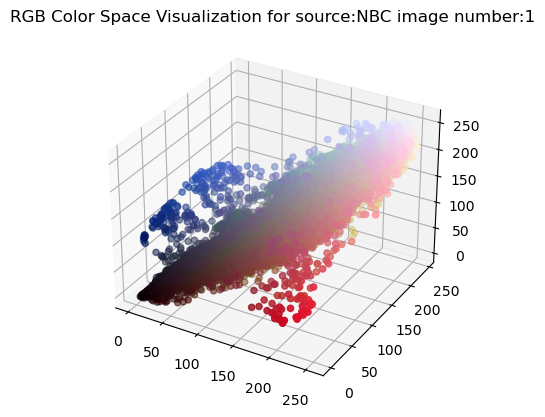

In [5]:
plt_3d_rgb('NBC', 1, rgb)

Let's see how the average pixel compares across news sources in terms of RGB.

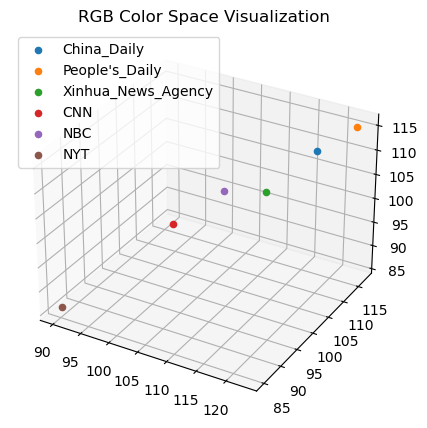

In [6]:
plt_3d_rgb_website_agg(['China_Daily', 'People\'s_Daily', 'Xinhua_News_Agency', 'CNN', 'NBC', 'NYT'], rgb)

## HSV and Lab Space

As we can see, RGB space is a bit unintuitive. The figure above does give some suggestion into the differences between Chinese and western news images though, as the Chinese ones seem to have larger values for R, G, B which may indicate the stronger use of colors as well as bright colors as opposed to dark, dull ones. Both HSV and Lab space through the V and L channels respectively give us some indication of lightness so let's see if we can investigate further using this. 

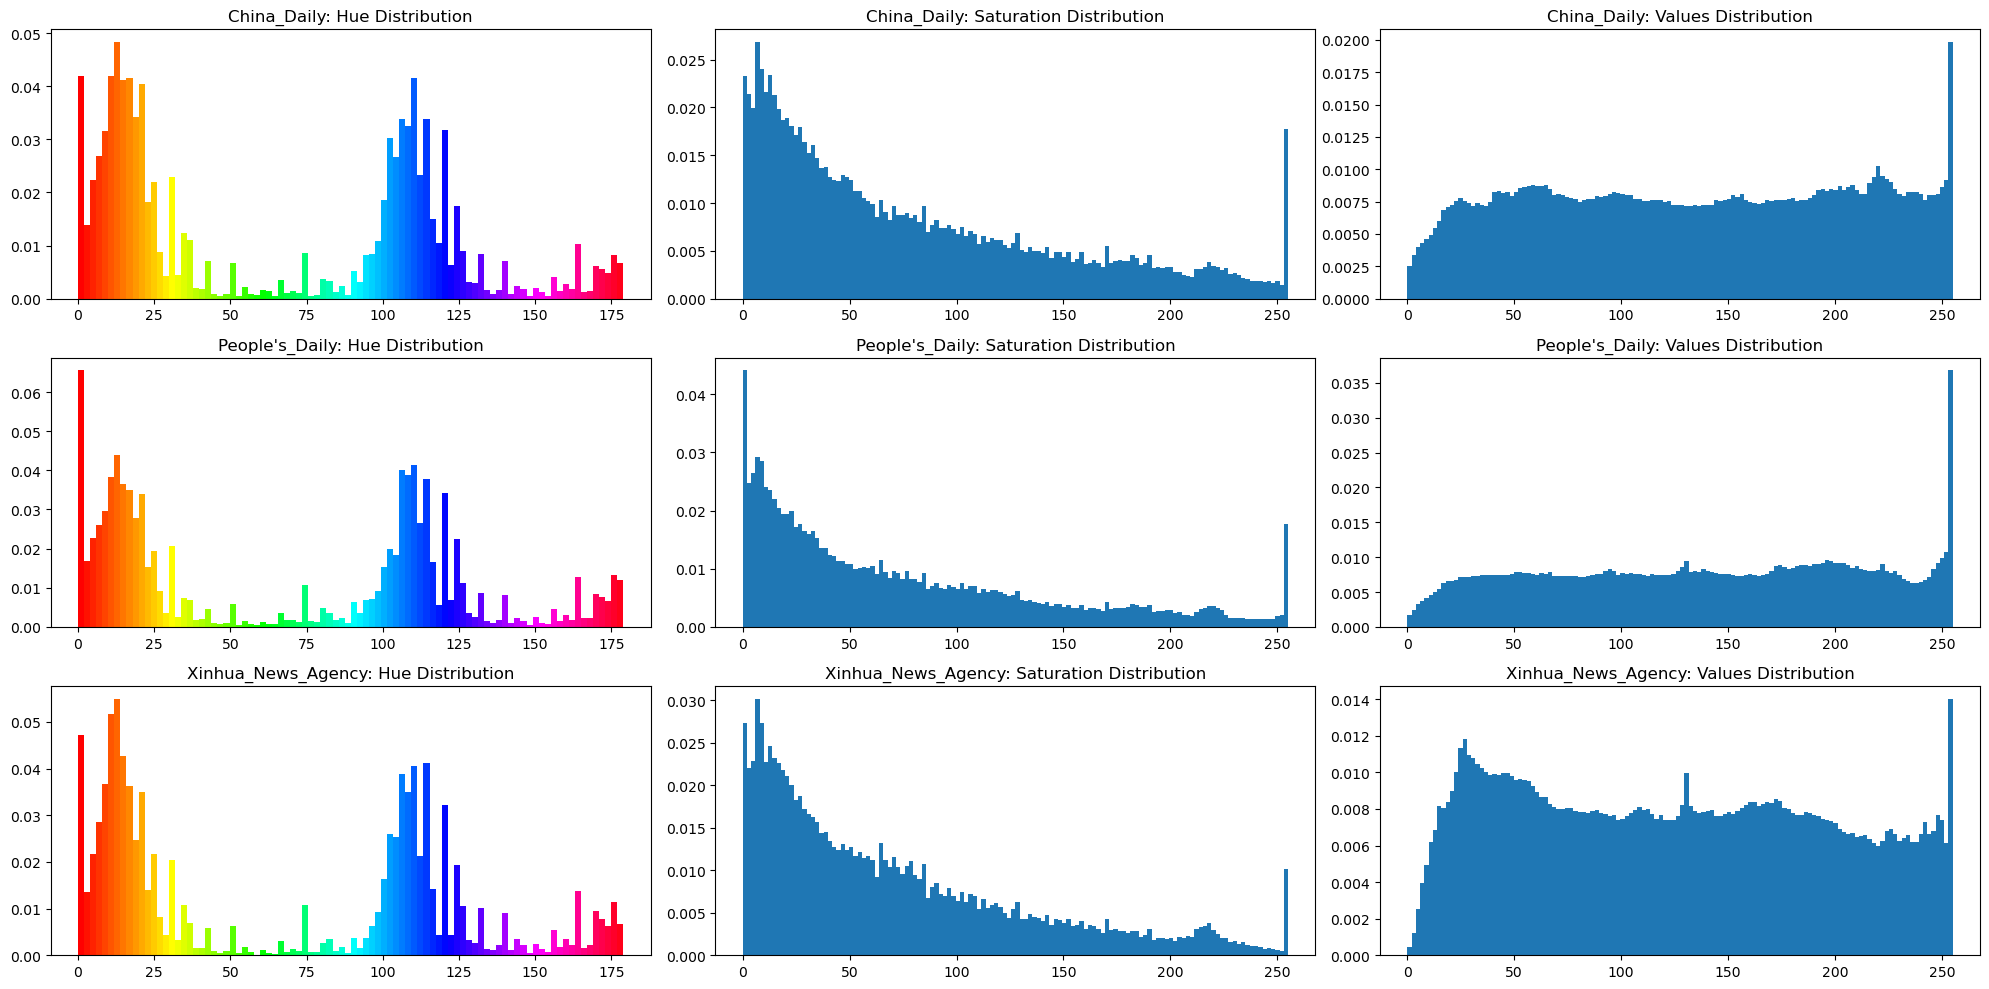

In [4]:
plt_channel_distributions(['China_Daily', 'People\'s_Daily', 'Xinhua_News_Agency'], hsv, '../figs/hsv/China_HSV_distributions.png', 'hsv')

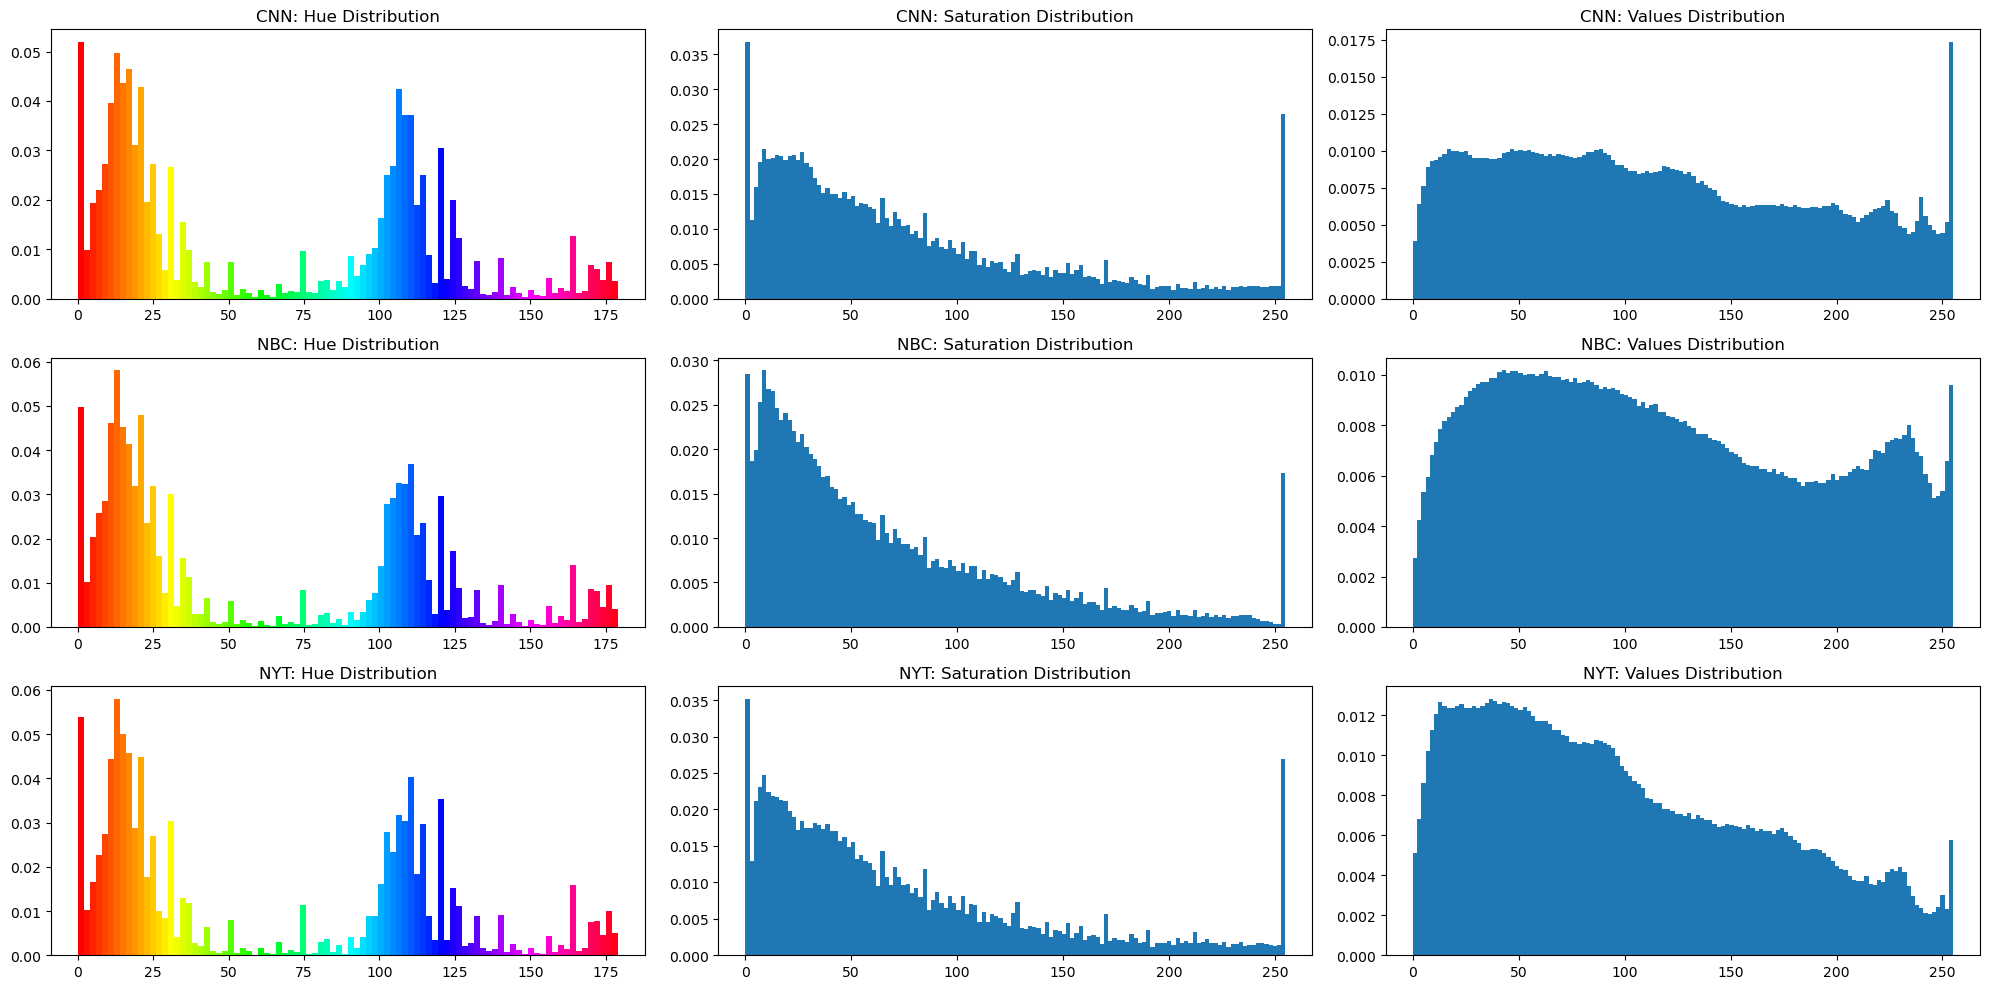

In [5]:
plt_channel_distributions(['CNN', 'NBC', 'NYT'], hsv, '../figs/hsv/US_HSV_distributions.png', 'hsv')

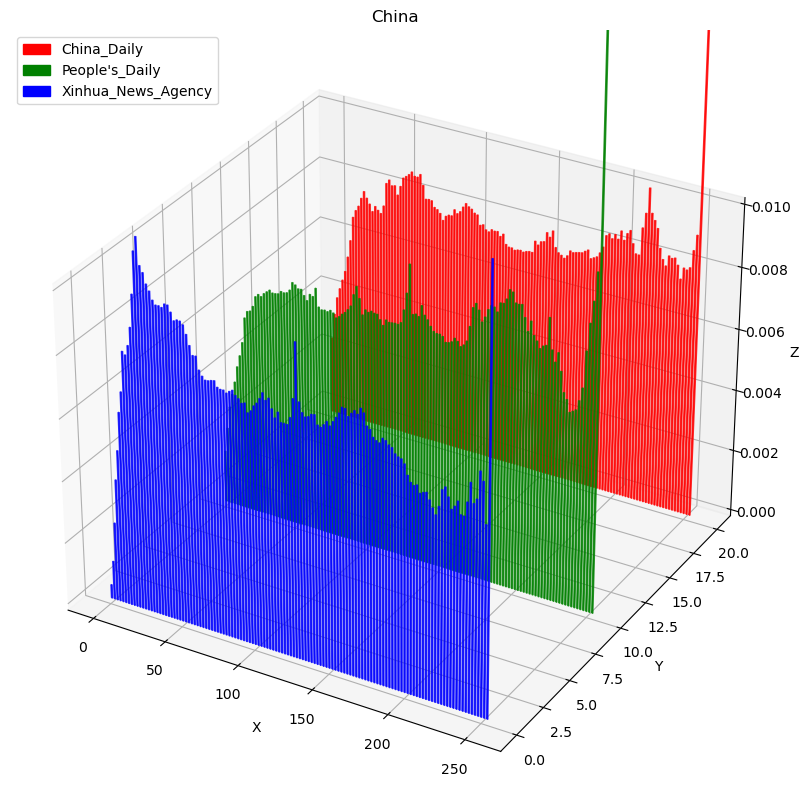

In [4]:
plt_channel_distribution_by_source_3d('China', ['China_Daily', 'People\'s_Daily', 'Xinhua_News_Agency'], ['r', 'g', 'b'], hsv, '../figs/hsv/China_V_distributions.png', 2)

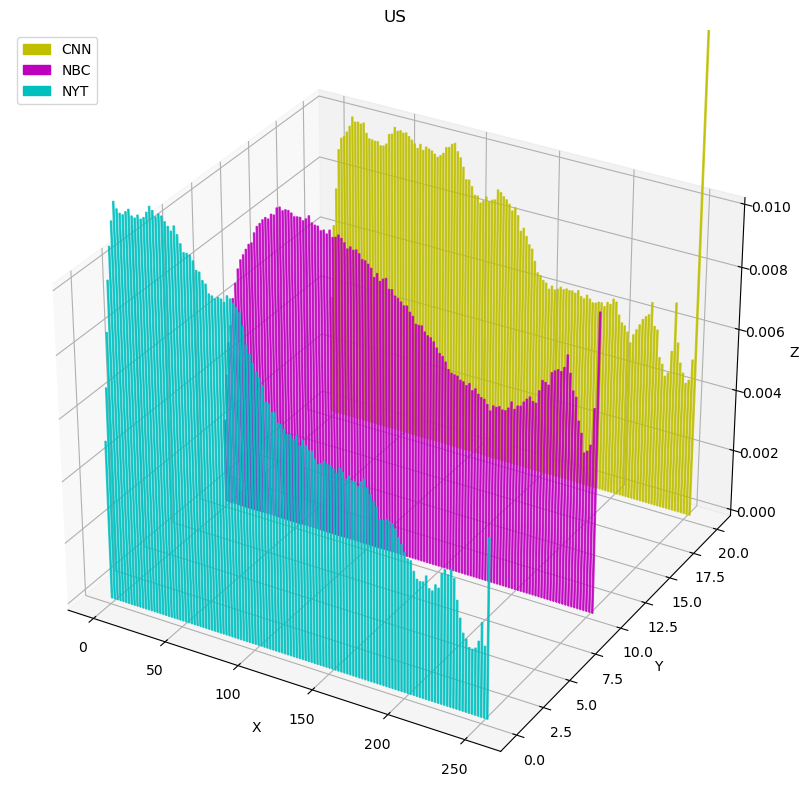

In [5]:
plt_channel_distribution_by_source_3d('US', ['CNN', 'NBC', 'NYT'], ['y', 'm', 'c'], hsv, '../figs/hsv/US_V_distributions.png', 2)

We see that across the websites, visually it appears that the distributions for hue and satuation seem to be the same. However, the channel that shows the most noticable difference between sources seems to be the 'values' channel which displays how bright/light the pixel is. We can further confirm this by assessing the distributions using the Jensen Shannon divergence, a metric that quantifies the difference between distributions as the divergence of one distribution from another.  

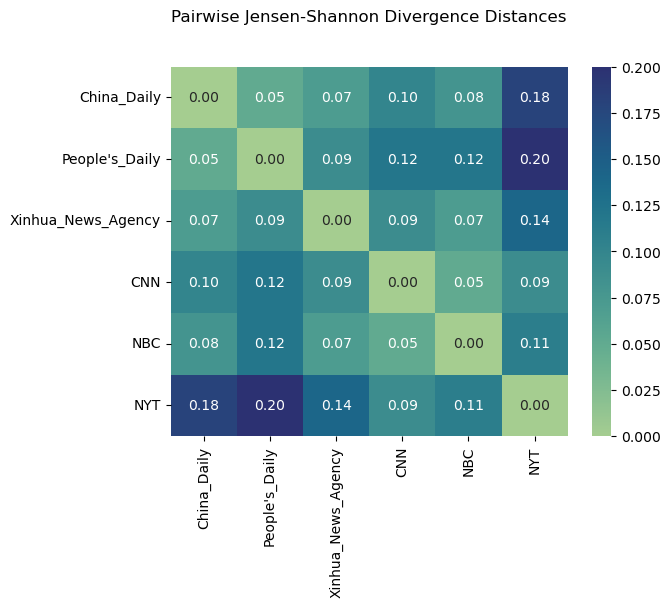

In [8]:
# get the v distributions
h_distributions, s_distributions, v_distributions = get_distributions(['China_Daily', "People's_Daily", 'Xinhua_News_Agency', 'CNN', 'NBC', 'NYT'], hsv)

# calculate pairwise jensen shannon divergence
dist, arr = get_jenson_shannon_distances(['China_Daily', "People's_Daily", 'Xinhua_News_Agency', 'CNN', 'NBC', 'NYT'], v_distributions)

# visualize the pairwise distances with a heatmap
df = pd.DataFrame(arr, index=['China_Daily', "People's_Daily", 'Xinhua_News_Agency', 'CNN', 'NBC', 'NYT'], columns=['China_Daily', "People's_Daily", 'Xinhua_News_Agency', 'CNN', 'NBC', 'NYT'])
df = df.round(2)

sns.heatmap(df, annot=True, fmt='.2f', cmap="crest")

plt.title('Pairwise Jensen-Shannon Divergence Distances', y=1.1)
plt.savefig('../figs/hsv/v_distribution_jensen_shannon_divergence_matrix.png')

Similarly, to verify that the differences in distributions are indeed significant, we can calculate their p-value using a Kolmogorov-Smirnov test, where lower p-values indicate a signficant difference between distributions. 

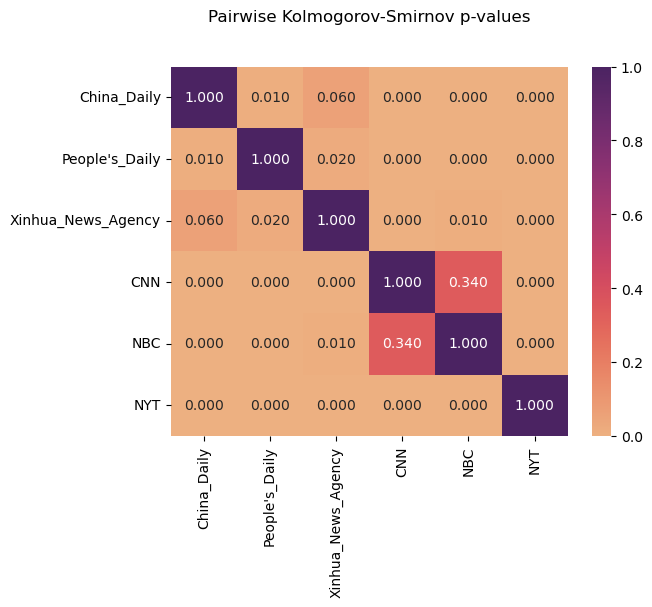

In [6]:
# calculate the pairwise p-values using a KS test
ks_test_p_vals, arr = get_ks_test_p_vals(['China_Daily', "People's_Daily", 'Xinhua_News_Agency', 'CNN', 'NBC', 'NYT'], v_distributions)

# visualize the p-values with a heatmap
df = pd.DataFrame(arr, index=['China_Daily', "People's_Daily", 'Xinhua_News_Agency', 'CNN', 'NBC', 'NYT'], columns=['China_Daily', "People's_Daily", 'Xinhua_News_Agency', 'CNN', 'NBC', 'NYT'])
df = df.round(2)

sns.heatmap(df, annot=True, fmt='.3f', cmap="flare")

plt.title('Pairwise Kolmogorov-Smirnov p-values', y=1.1)
plt.savefig('../figs/hsv/v_distribution_kolmogorov_smirnov_matrix.png')

## Lab Space

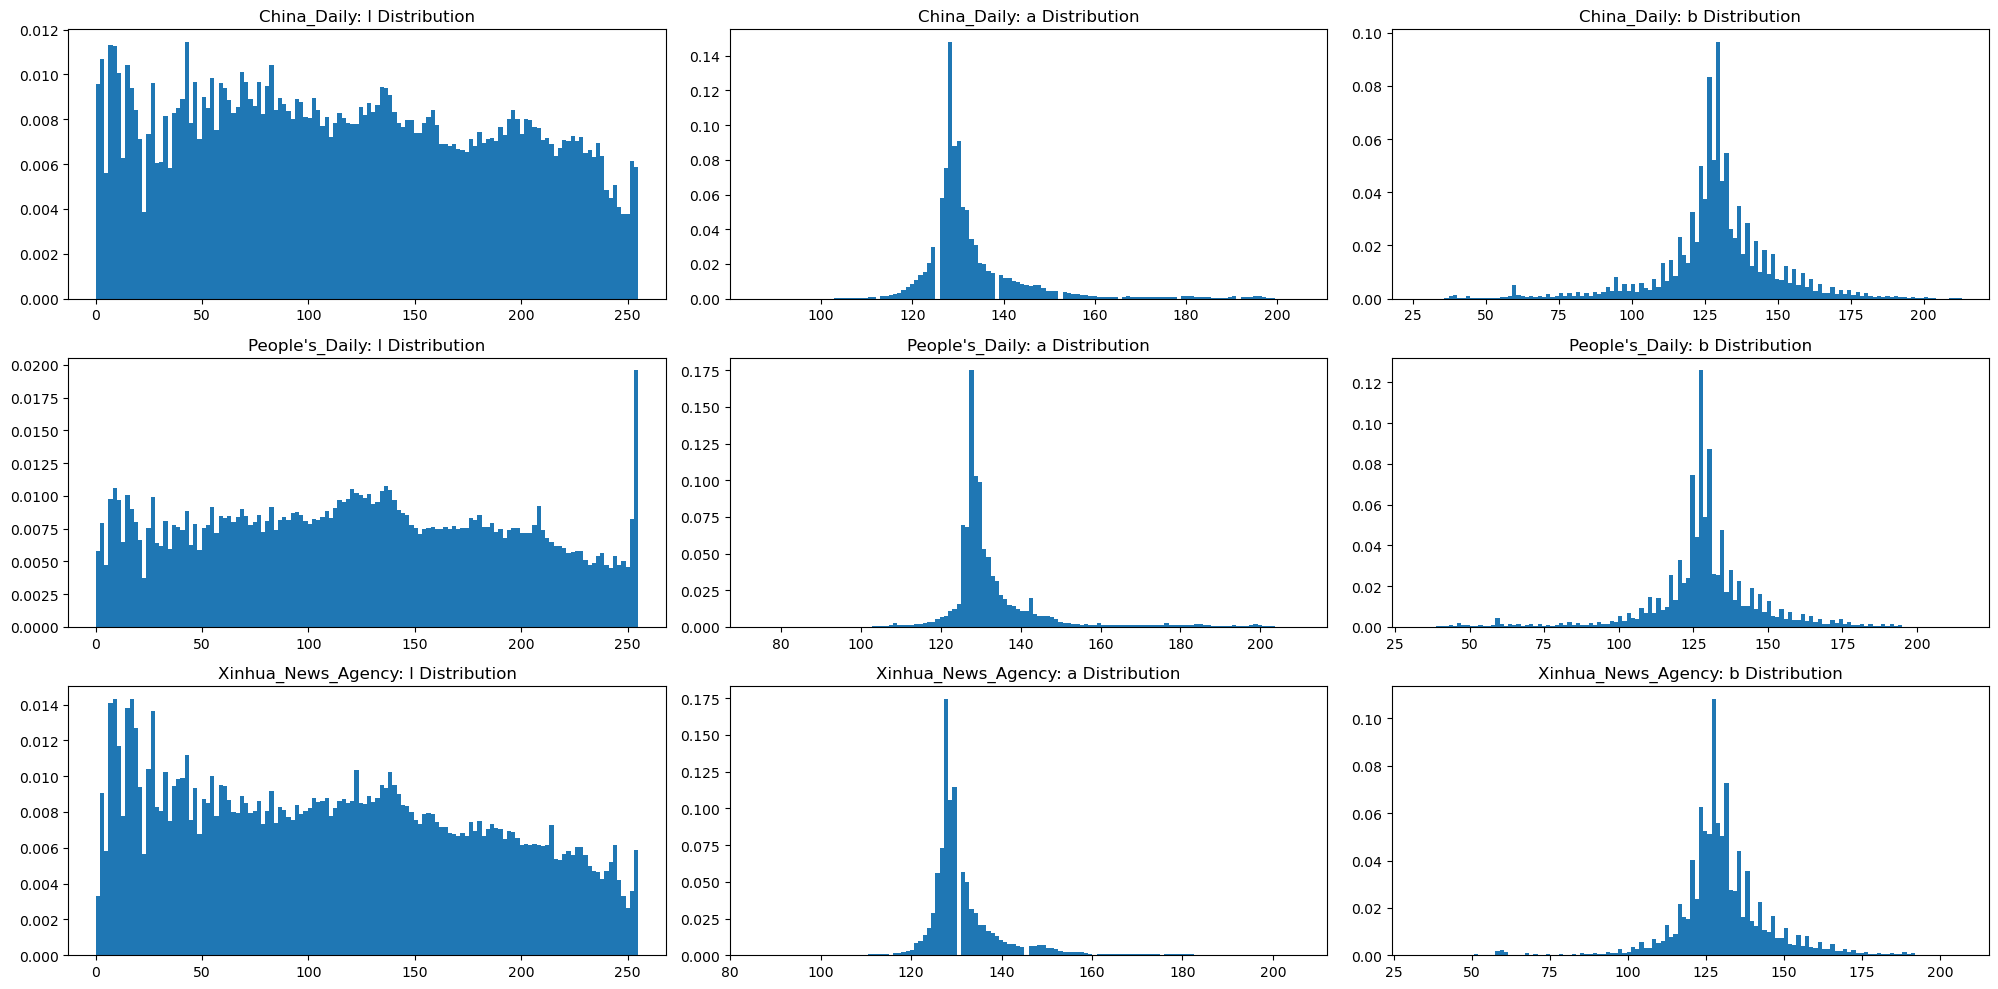

In [4]:
plt_channel_distributions(['China_Daily', 'People\'s_Daily', 'Xinhua_News_Agency'], lab, '../figs/hsv/China_LAB_distributions.png', 'lab')

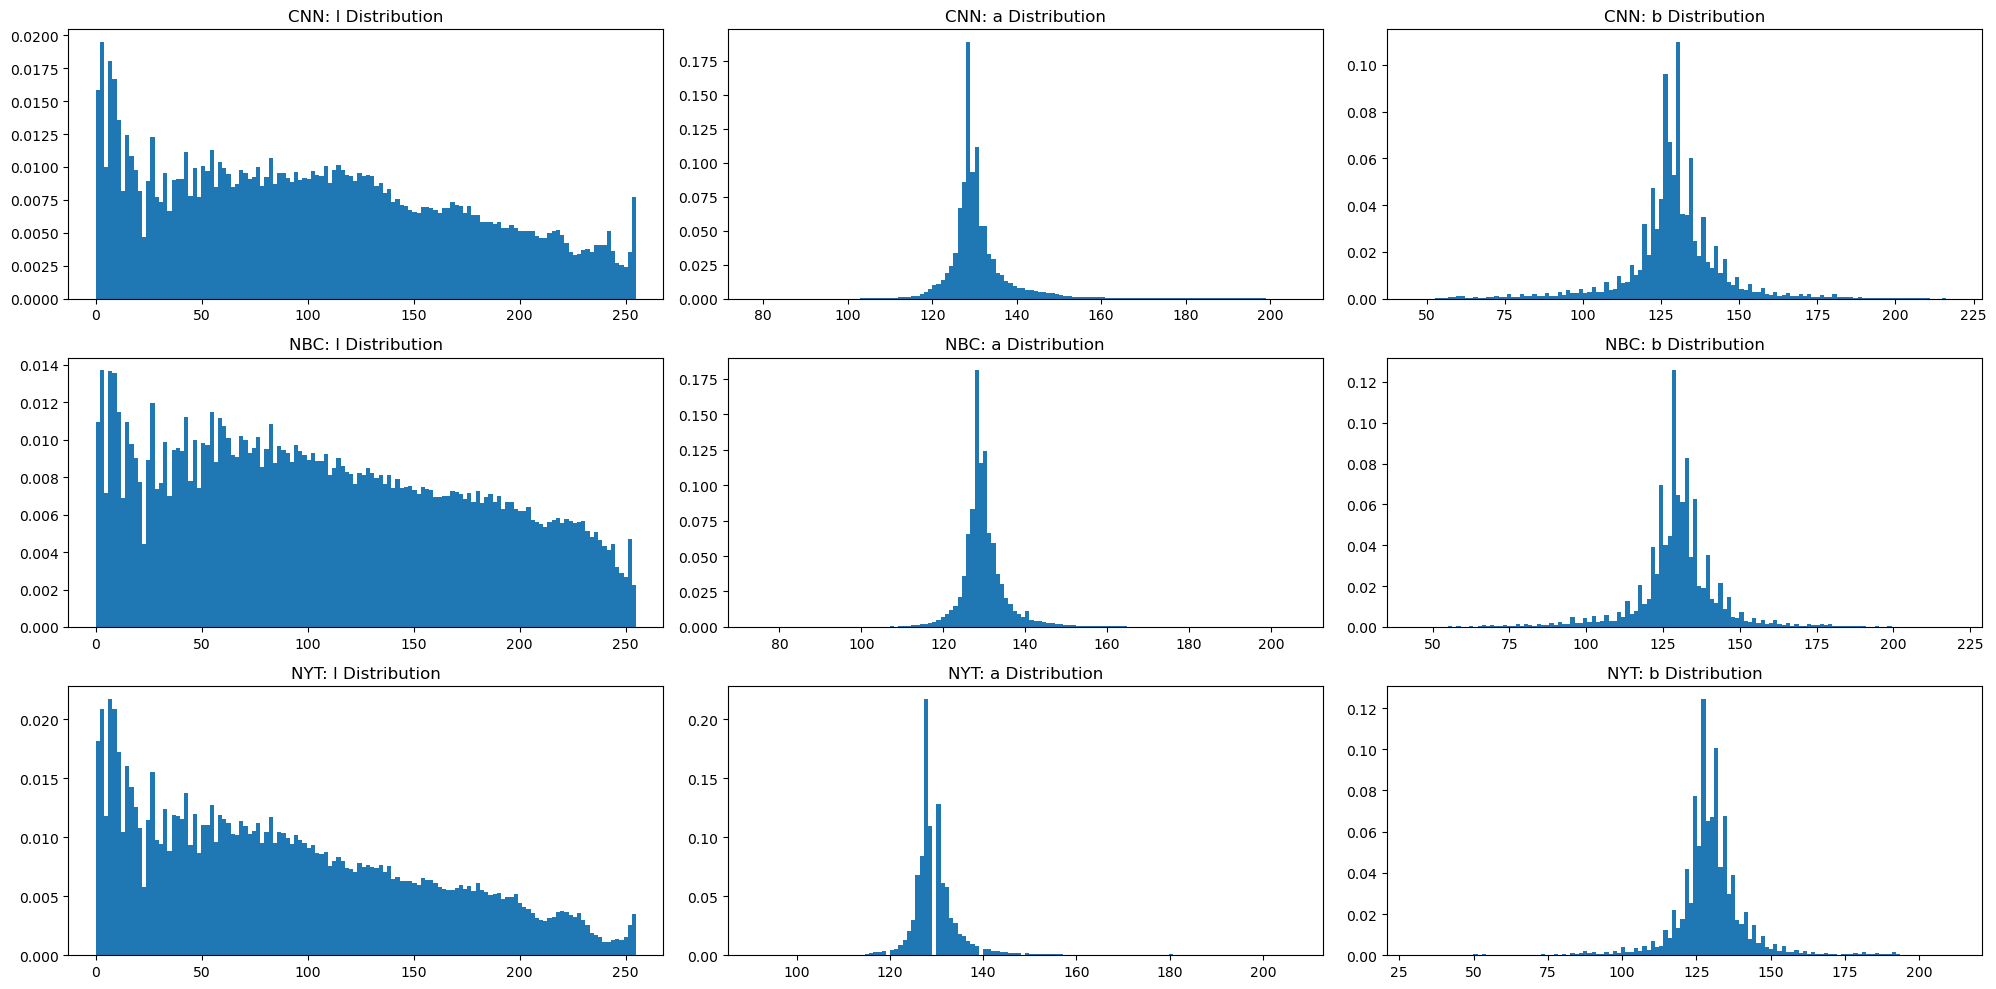

In [5]:
plt_channel_distributions(['CNN', 'NBC', 'NYT'], lab, '../figs/hsv/US_LAB_distributions.png', 'lab')

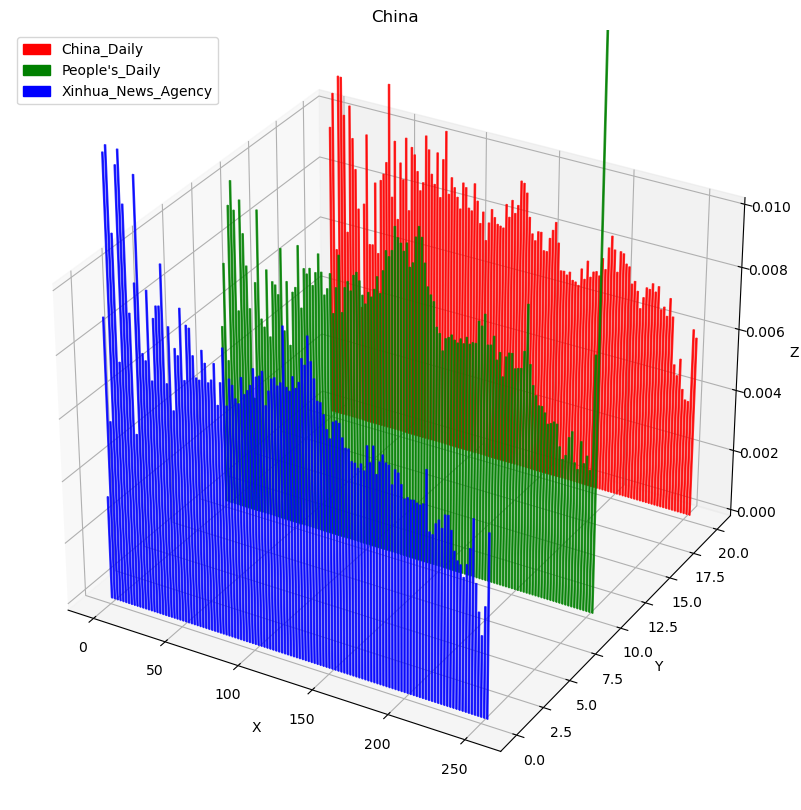

In [6]:
plt_channel_distribution_by_source_3d('China', ['China_Daily', 'People\'s_Daily', 'Xinhua_News_Agency'], ['r', 'g', 'b'], lab, '../figs/hsv/China_L_distributions.png', 0)

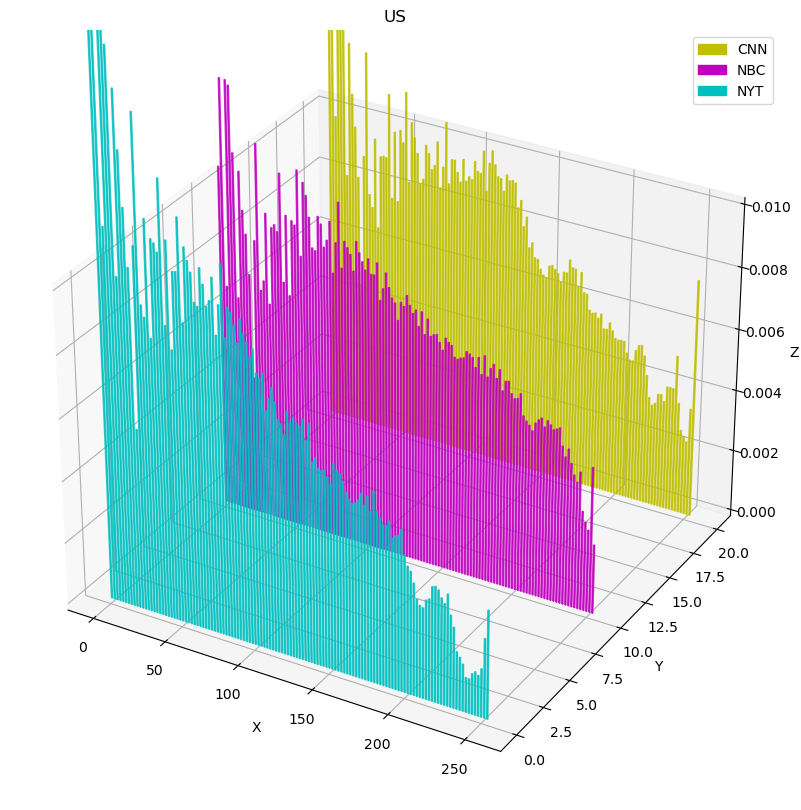

In [7]:
plt_channel_distribution_by_source_3d('US', ['CNN', 'NBC', 'NYT'], ['y', 'm', 'c'], lab, '../figs/hsv/US_L_distributions.png', 0)

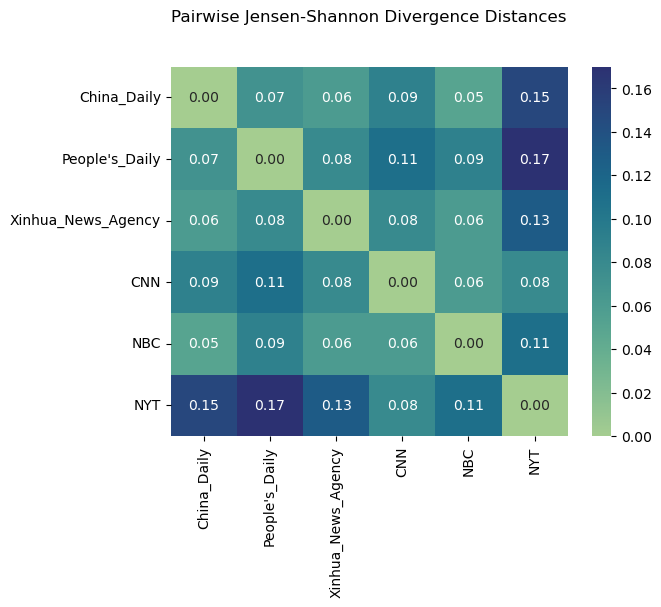

In [8]:
# get the l distributions
l_distributions, a_distributions, b_distributions = get_distributions(['China_Daily', "People's_Daily", 'Xinhua_News_Agency', 'CNN', 'NBC', 'NYT'], lab)

# calculate pairwise jensen shannon divergence
dist, arr = get_jenson_shannon_distances(['China_Daily', "People's_Daily", 'Xinhua_News_Agency', 'CNN', 'NBC', 'NYT'], l_distributions)

# visualize the pairwise distances with a heatmap
df = pd.DataFrame(arr, index=['China_Daily', "People's_Daily", 'Xinhua_News_Agency', 'CNN', 'NBC', 'NYT'], columns=['China_Daily', "People's_Daily", 'Xinhua_News_Agency', 'CNN', 'NBC', 'NYT'])
df = df.round(2)

sns.heatmap(df, annot=True, fmt='.2f', cmap="crest")

plt.title('Pairwise Jensen-Shannon Divergence Distances', y=1.1)
plt.savefig('../figs/lab/l_distribution_jensen_shannon_divergence_matrix.png')

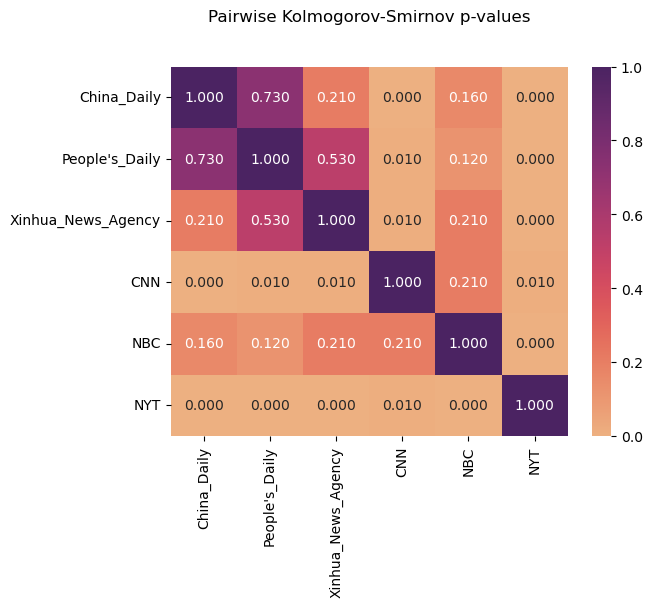

In [9]:
# calculate the pairwise p-values using a KS test
ks_test_p_vals, arr = get_ks_test_p_vals(['China_Daily', "People's_Daily", 'Xinhua_News_Agency', 'CNN', 'NBC', 'NYT'], l_distributions)

# visualize the p-values with a heatmap
df = pd.DataFrame(arr, index=['China_Daily', "People's_Daily", 'Xinhua_News_Agency', 'CNN', 'NBC', 'NYT'], columns=['China_Daily', "People's_Daily", 'Xinhua_News_Agency', 'CNN', 'NBC', 'NYT'])
df = df.round(2)

sns.heatmap(df, annot=True, fmt='.3f', cmap="flare")

plt.title('Pairwise Kolmogorov-Smirnov p-values', y=1.1)
plt.savefig('../figs/lab/l_distribution_kolmogorov_smirnov_matrix.png')

## Standard Metrics


In [6]:
# print the standard distribution metrics for the l-channel in lab space for each source 
get_standard_metrics(l_distributions)

# export standard metrics for lab space into .csv format
lab_metrics_df = get_standard_metrics_df(lab, 'lab')
lab_metrics_df.to_csv('../output/metrics_lab.csv', index=False)

# export standard metrics for hsv space into .csv format
hsv_metrics_df = get_standard_metrics_df(hsv, 'hsv')
lab_metrics_df.to_csv('../output/metrics_hsv.csv', index=False)

SUMMARY: 


===== China_Daily =====
--> mean: 119.54357293639521
--> median: 117.0
--> mode: 27.0
--> max: 255.0
--> min: 0.0
--> skew: 0.10792437758004342
--> kurtosis: -1.1358067047333436

===== People's_Daily =====
--> mean: 123.82436239839804
--> median: 123.0
--> mode: 255.0
--> max: 255.0
--> min: 0.0
--> skew: 0.06912272049196284
--> kurtosis: -1.0540366933231473

===== Xinhua_News_Agency =====
--> mean: 113.45086732202647
--> median: 111.0
--> mode: 27.0
--> max: 255.0
--> min: 0.0
--> skew: 0.18579677801377895
--> kurtosis: -1.0980991039447907

===== CNN =====
--> mean: 105.12270100911458
--> median: 100.0
--> mode: 2.0
--> max: 255.0
--> min: 0.0
--> skew: 0.3082549094785972
--> kurtosis: -0.9239134066166548

===== NBC =====
--> mean: 110.75986735026042
--> median: 104.0
--> mode: 27.0
--> max: 255.0
--> min: 0.0
--> skew: 0.2370465061560138
--> kurtosis: -1.0440765254506754

===== NYT =====
--> mean: 91.73648040463226
--> median: 81.0
--> mode: 7.0
--> max: 255.0
--> min: 0.